# **Quantum Computing — the soft way**
### *QPlayLearn*

First of all, we install and import all the packages we are going to need to run the code

In [1]:
# Qiskit is the open-source library for quantum computing founded by IBM
import qiskit as qk
from qiskit.quantum_info import Statevector # to get the state coefficients
from qiskit_aer import AerSimulator # to run circuits on the quantum computer simulator

# Packages for graphical representations and plots
import matplotlib as mpl
import matplotlib.pyplot as plt

# Math library
import numpy as np

## **QC SANDBOX #1 - Amplitude game**

We have learnt about qubits and crush a good amount of math, now it's time to put your fingers on the keyboard! Before playing the amplitude game, let's look at some basic commands on Qiskit. We'll work mostly on Qiskit as it's the most used library, but once you get the handle of it, you can easily switch to others such as QASM. 

Let's start by creating a simple quantum circuit with 1 qubit, we can also visualise it in the same way we have seen in the previous section of the course.

In [3]:
# Create a quantum circuit with 1 qubit
num_qubits = 1
qc = qk.QuantumCircuit(num_qubits)

# Apply a X gate on the qubit
qc.x(0)

# Draw a graphical representation of the circuit (using matplotlib)
print(qc)

   ┌───┐
q: ┤ X ├
   └───┘


The X gate transform the initial state into $\ket{\psi_{final}} = X \ket{\psi_{initial}}$. At this point, we should be able to calculate with pen on paper the final state of simple quantum circuits. However, on Qiskit we have the possibility of quickly checking the array of coefficients or amplitudes of the final state at the end of the circuit $$ [ a, b], \ \ \  \ket{\psi} = a \ket{0} + b \ket{1}$$

In [6]:
# Compute the state of corresponding to the quantum circuit. Note that j is the imaginary unit
psi = Statevector(qc)
print("|psi_final> = ", psi.data)

|psi_final> =  [0.+0.j 1.+0.j]


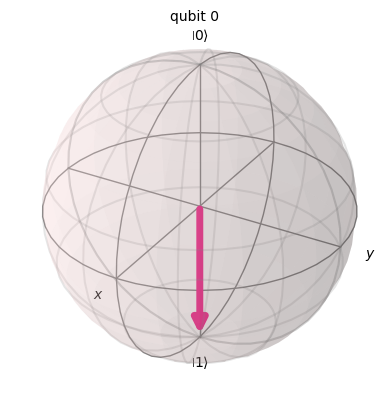

In [25]:
from qiskit.visualization import plot_bloch_multivector

# Create a quantum circuit with 1 qubit and apply a gate
qc = qk.QuantumCircuit(1)
qc.x(0)

# Plot its representation in the bloch sphere
plot_bloch_multivector(qc)

In [19]:
def bloch_vector(state):
    """
    Calculate components in Bloch Sphere given a quantm state (a ket |psi>) 
    """
    I = np.array([[1, 0], [0, 1]])
    X = np.array([[0, 1], [1, 0]])
    Y = np.array([[0, -1j], [1j, 0]])
    Z = np.array([[1, 0], [0, -1]])

    rho = np.outer(state, np.conjugate(state))
    rx = np.trace(np.dot(rho, X)).real
    ry = np.trace(np.dot(rho, Y)).real
    rz = np.trace(np.dot(rho, Z)).real
    return rx, ry, rz

def plot_state(states, ax = None):
    """
    Plot single qubit quantum states on the bloch sphere.
    """
    from qiskit.visualization import plot_bloch_vector

    states = np.array(states)
    
    if ax == None:
        fig = plt.figure(figsize=(9.6, 6))
        ax = plt.subplot(projection='3d')

    plot_bloch_vector([0, 0, 0], ax=ax)

    if states.ndim == 1:
        states = np.expand_dims(states, 0)

    cmap = plt.cm.viridis.resampled(len(states))

    for i, state in enumerate(states):
        x, y, z = bloch_vector(state)
        ax.plot(y, -x, z, marker='o', color=cmap(i), markersize=10, alpha=1.)
    return ax

<Axes3D: >

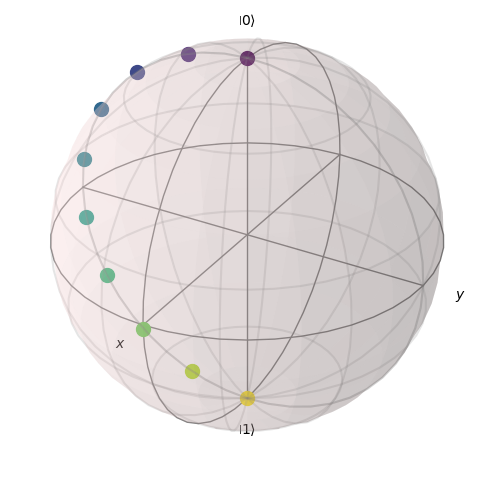

In [23]:
# Visualizing rotations along the Pauli axis
theta = np.linspace(0, np.pi, 10)

state_list = []
for t in theta:
    qc = qk.QuantumCircuit(1)
    qc.rx(t, 0)
    state_list.append(Statevector(qc).data)    

plot_state(state_list)

Apply the correct gates so that the final state has amplitude $\alpha = \frac{i}{\sqrt{2}}$ and $\beta = \frac{1}{\sqrt{2}}$.

## **QC SANDBOX #2 - Bell states**

When dealing with more than one qubit, we can use the same commands for applying gates and checking the coefficients of the final state. The latter action, though, might not be as convenient, because the number of coefficients grows exponentially with the number of qubits, and *the order* they are listed with *can be tricky* on Qiskit!

Remember that a generic state of two qubits is
$$ \ket{\psi} = a\ket{00}+b \ket{01}+c\ket{10}+d \ket{11}$$

However, Qiskit orders qubit indices differently, in reversed ("little-endian") order, that is

In [15]:
# Create a circuit with more qubits
num_qubits = 4
qc = qk.QuantumCircuit(num_qubits)

# Apply a layer of single qubit gates
for n in range(num_qubits):
    qc.h(n)

# Apply a CNOT gate, remember to specify both target and control!
control_qubit_index = 0
target_qubit_index = 1
qc.cx(control_qubit_index, target_qubit_index)

# Draw a graphical representation of the circuit
print(qc)

# Compute the state of corresponding to the quantum circuit
psi = Statevector(qc)
print("|psi_final> = ", psi.data)

     ┌───┐     
q_0: ┤ H ├──■──
     ├───┤┌─┴─┐
q_1: ┤ H ├┤ X ├
     ├───┤└───┘
q_2: ┤ H ├─────
     ├───┤     
q_3: ┤ H ├─────
     └───┘     
|psi_final> =  [0.25+0.j 0.25+0.j 0.25+0.j 0.25+0.j 0.25+0.j 0.25+0.j 0.25+0.j 0.25+0.j
 0.25+0.j 0.25+0.j 0.25+0.j 0.25+0.j 0.25+0.j 0.25+0.j 0.25+0.j 0.25+0.j]


We have seen that the combination of H+CNOT generates entanglement. We build a Bell state like this

For a system of two qubits, we can find other 3 maximally entangled states, also sometimes called Bell states. The 4 Bell States are
$$\begin{split} &\ket{\Phi^+} = \frac{1}{\sqrt{2}} ( \ket{00} + \ket{11}) \\ &\ket{\Phi^-} = \frac{1}{\sqrt{2}} ( \ket{00} - \ket{11}) \\ &\ket{\Psi^+} = \frac{1}{\sqrt{2}} ( \ket{01} + \ket{10}) \\ &\ket{\Psi^-} = \frac{1}{\sqrt{2}} ( \ket{01} - \ket{10}) \end{split} $$
We challenge you to create the remaining three. As earlier, we will need the help of a CNOT gate. 


In [27]:
# Create a circuit to realise the 3 remaining Bell states
num_qubits = 6
qcBells = qk.QuantumCircuit(num_qubits)

# ...

print(qcBells)

     
q_0: 
     
q_1: 
     
q_2: 
     
q_3: 
     
q_4: 
     
q_5: 
     


We are now familiar with the idea that the squared modulus of each amplitude gives us the probability of finding the qubits in a certain state of the computational basis. We also know that a single measurement does not tell us much about the qubits. We need instead to run the circuit and measure many times, to collect enough data to estimate the probabilities and reconstruct what the qubits’ state was before the measurement. 
 
Let’s see what this means in practice for the Bell state $\ket{\Phi^-}$. By looking at it, we can read that we have equal probability 1/2 of finding the qubits in |00> or |11>. This means that half the times we run the experiments (“shots”) we should get 00 as output, and 11 the other half. What happens if we run the experiments only 1, 5, or 10 times? 
 
Increase the number of shots to see a more and more accurate estimation of the probabilities. 

Let's learn how to run a quantum circuit, first on a simulator

In [4]:
# Set AerSimulator from Qiskit as a backend to run the circuit
sim_bknd = AerSimulator()

# Create the quantum circuit and add a measurement at the end
qc = qk.QuantumCircuit(2)
qc.measure_all()

# Run the circuit on the AerSimulator backend and get the results
num_shots = 1000
res = sim_bknd.run(qc, shots = 1).result()

# Print the results 
print("Measurement outcomes\n", res.get_counts())

Measurement outcomes
 {'00': 1}


Increase the number of shots and see how the histogram changes

## **QC SANDBOX #3 - Teleportation protocol**

We’ll tell you the steps of the algorithm and give you some suggestion, but the actual code is on you! Decide if you want to write it cell by cell, or all together at the end


##### 1 -  Three qubits are involved the protocol. Alice has two qubits with her, Bob has the third one.
Qubits are initialised in state $\ket{000}$

##### 2 - Alice and Bob share a pair of entangled qubits in $\ket{\Phi^+} $
Qubits are in state $\ket{0}\ket{\Phi^+} = \frac{1}{\sqrt{2}} (\ket{000} + \ket{011})$

##### 3 - Alice encodes in the first qubit an unknown state $\ket{\psi}$ to teleport
Prepare an arbitrary state on the third qubit for Alice — you will know it but Alice and Bob don’t. At this point, qubits should be in state $\ket{\psi}\ket{\Phi^+} = \alpha \ket{0} \ket{\Phi^+} + \beta \ket{1} \ket{\Phi^+} = \frac{1}{\sqrt{2}} \bigl[\alpha (\ket{000} + \ket{011}) + \beta (\ket{100} + \ket{111}) \bigr]$

##### 4 - Alice wants to entangle her two qubits — of course she uses a CNOT on qubit 1 and 2 and a Hadamard gate on qubit 1
Pheeew, the expression for the state is quiet long, but bear with us $$\begin{split} &H \frac{1}{\sqrt{2}} \bigl[\alpha (\ket{000} + \ket{011}) + \beta (\ket{110} + \ket{101}) \bigr] =\\ &=\frac{1}{\sqrt{2}} \Biggl[ \alpha \biggl(\frac{\ket{0}+\ket{1}}{\sqrt{2}}\ket{00} + \frac{\ket{0}+\ket{1}}{\sqrt{2}}\ket{11} \biggr) + \beta \biggl(\frac{\ket{0}-\ket{1}}{\sqrt{2}}\ket{10} + \frac{\ket{0}-\ket{1}}{\sqrt{2}}\ket{01} \biggr) \end{split}$$